<a href="https://colab.research.google.com/github/Aniketkkajania/Emoji_Prediction/blob/main/EmojiPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
text_labels = pd.read_csv("Comment-Emoji Dataset.csv")

In [ ]:
text_labels = text_labels.drop(columns = "Unnamed: 0")

In [ ]:
text_labels

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3
...,...,...
69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,If one of my daughters is wearing this and ask...,2
69998,Guess who whoop people on THEIR homecoming?! #...,3


In [ ]:
import string
import re

def data_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove @mentions
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             # remove RT
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc

    return cleaned

In [ ]:
text_labels['TEXT'] = text_labels["TEXT"].apply(data_clean)
text_labels[:5]

,TEXT,Label
0,vacation wasted vacation photobomb tired vaca...,0
1,oh wynwood you’re so funny wynwood art itwas...,1
2,been friends since th grade look at us now we ...,2
3,this is what it looks like when someone loves ...,3
4,rt this white family was invited to a black b...,3


In [ ]:
import nltk
import spacy
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def stop_words_removal(tweet, nlp=nlp, lemmatizer=lemmatizer):

    stop_words = nlp.Defaults.stop_words
    rm_stop_words_lemma = []

    doc = nlp(tweet)
    for token in doc:                                            # tokenization
        if token.text not in stop_words and token.pos_!="PUNCT":
            lemma_word = lemmatizer.lemmatize(token.text)        # removing stop
            rm_stop_words_lemma.append(lemma_word)               # lemmatizing words

    processed = " ".join(rm_stop_words_lemma)
    return processed

In [ ]:
import nltk
nltk.download('wordnet')
text_labels["TEXT"] = text_labels['TEXT'].apply(stop_words_removal)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
text_labels

,TEXT,Label
0,vacation wasted vacation photobomb tired vac...,0
1,oh wynwood funny wynwood art itwasam flower...,1
2,friend th grade look following dream love … \n,2
3,look like love unconditionally oh puppy brothe...,3
4,rt white family invited black barbecue ve la...,3
...,...,...
69995,yes galina bubie follow beautiful friend gali ...,3
69996,sea seattle ballard seafood festival \n,16
69997,daughter wearing asks ice cream wo nt \n,2
69998,guess whoop people homecoming asurams atlant...,3


In [ ]:
emoji_labels = pd.read_csv("emoji-mapping.csv")
emoji_labels = emoji_labels.rename(columns = {"number": "Label"})
emoji_labels = emoji_labels.drop(columns = "Unnamed: 0")
emoji_labels

,emoticons,Label
0,😜,0
1,📸,1
2,😍,2
3,😂,3
4,😉,4
5,🎄,5
6,📷,6
7,🔥,7
8,😘,8
9,❤,9


In [ ]:
emoji_data = emoji_labels['emoticons'].to_dict()

## Over Sampling the Data

In [ ]:
X = text_labels["TEXT"].values
y = text_labels["Label"].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [ ]:
X = X.reshape(-1,)
X.shape

(301820,)

# **Tokenization**

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [ ]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['vacation wasted   vacation photobomb tired vacationwasted mcgar miami   port \n'
 'oh wynwood funny    wynwood art itwasam flower vibe   wynwood \n'
 'friend th grade look following dream love … \n'
 'look like love unconditionally oh puppy brother htx \n'
 'rt   white family invited black barbecue ve laughed hard life \n'
 'track season   m ready ya   university incarnate word \n'
 'merry christmas filthy little animal wearing   ugly sweater featuring santa … \n'
 'westenders   lazznation   weston toronto \n'
 'maxwell head home   summa akron city hospital \n'
 'story saturday   collins ave miami beach fl   lady contact join … \n'] 

Sequences


[[361, 4625, 361, 4408, 1528, 13497, 13498, 61, 1093],
 [149, 954, 613, 954, 72, 30359, 742, 230, 954],
 [23, 49, 1763, 44, 2472, 206, 3, 1],
 [44, 18, 3, 11526, 149, 721, 228, 4626],
 [1222, 168, 36, 5801, 311, 4948, 113, 6529, 243, 34],
 [871, 143, 16, 88, 193, 27, 12419, 430],
 [65, 9, 2875, 29, 773, 653, 1010, 1017, 1219, 208, 1],
 [19301, 19302, 3890, 201],
 [7099, 378, 50, 4258, 3107, 22, 1011],
 [602, 107, 2916, 1118, 61, 11, 299, 134, 1812, 472, 1]]

In [ ]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,10):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> …
Index:  2 ----> new
Index:  3 ----> love
Index:  4 ----> day
Index:  5 ----> ️
Index:  6 ----> happy
Index:  7 ----> amp
Index:  8 ----> nt
Index:  9 ----> christmas


In [ ]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 74090


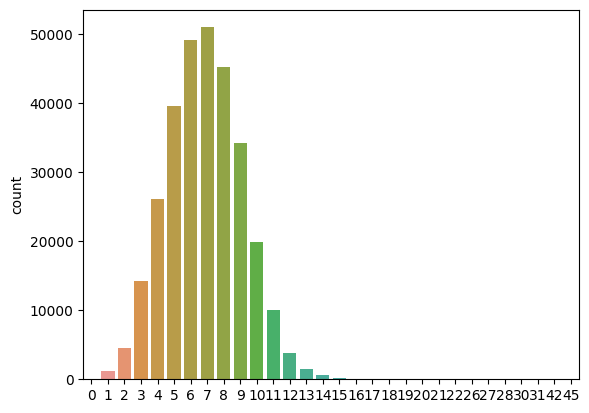

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [ ]:
from keras.utils import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[361, 4625, 361, 4408, 1528, 13497, 13498, 61, 1093]]

After Padding
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0   361  4625   361  4408  1528
  13497 13498    61  1093]]


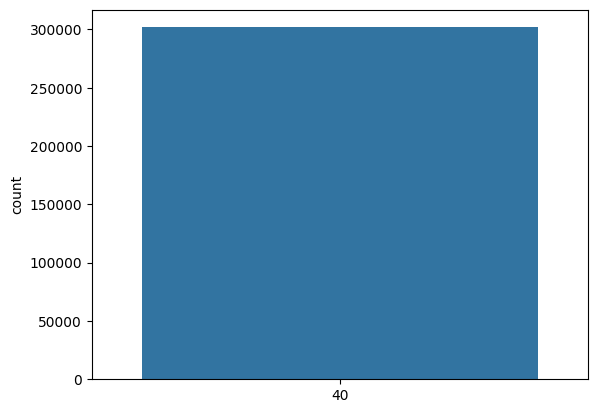

In [ ]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.3, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (211274, 40)
Training y Dim  (211274,)
Test X Dim  (90546, 40)
Test y Dim  (90546,)


# **Deep Learning Model using LSTMs**

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=20

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 20)            1481820   
                                                                 
 lstm (LSTM)                 (None, 40, 80)            32320     
                                                                 
 dropout (Dropout)           (None, 40, 80)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
Total params: 1,534,320
Trainable params: 1,534,320
Non-

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=128
epochs = 20

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/20
1651/1651 [==============================] - 55s 28ms/step - loss: 2.3201 - accuracy: 0.2886 - val_loss: 1.6801 - val_accuracy: 0.5169
Epoch 2/20
1651/1651 [==============================] - 19s 11ms/step - loss: 1.3955 - accuracy: 0.6124 - val_loss: 1.1271 - val_accuracy: 0.6919
Epoch 3/20
1651/1651 [==============================] - 16s 10ms/step - loss: 0.9850 - accuracy: 0.7370 - val_loss: 0.9312 - val_accuracy: 0.7535
Epoch 4/20
1651/1651 [==============================] - 19s 12ms/step - loss: 0.7867 - accuracy: 0.7887 - val_loss: 0.8148 - val_accuracy: 0.7847
Epoch 5/20
1651/1651 [==============================] - 17s 10ms/step - loss: 0.6617 - accuracy: 0.8221 - val_loss: 0.7649 - val_accuracy: 0.8059
Epoch 6/20
1651/1651 [==============================] - 18s 11ms/step - loss: 0.5746 - accuracy: 0.8453 - val_loss: 0.7180 - val_accuracy: 0.8198
Epoch 7/20
1651/1651 [==============================] - 16s 10ms/step - loss: 0.5095 - accuracy: 0.8629 - val_loss: 0.6768 -

In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

708/708 [==============================] - 3s 4ms/step - loss: 0.6305 - accuracy: 0.8625


[0.6305405497550964, 0.8624787330627441]

In [ ]:
y_pred = model.predict(X_test)

2830/2830 [==============================] - 10s 3ms/step


In [ ]:
y_pred

array([[1.6863874e-05, 9.8842452e-07, 3.9446499e-05, ..., 2.7108194e-06,
        9.9950385e-01, 3.4926734e-07],
       [3.6222080e-03, 2.8028060e-02, 2.0194482e-02, ..., 4.9834237e-02,
        7.1559744e-03, 2.3592220e-01],
       [6.0872949e-08, 1.1006233e-08, 1.2070819e-06, ..., 1.7106817e-08,
        7.7418662e-07, 5.7595737e-09],
       ...,
       [8.4800789e-08, 4.4293638e-06, 5.9558010e-07, ..., 1.0814522e-06,
        1.5740094e-08, 1.3180526e-11],
       [1.2629206e-08, 2.9150937e-07, 9.9782628e-01, ..., 2.4403454e-04,
        1.2204914e-07, 6.0452421e-10],
       [9.7486793e-07, 2.1518308e-07, 3.3630972e-06, ..., 6.0668185e-07,
        2.7516694e-07, 7.2870968e-08]], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test_cat, y_pred)*100,"%")

79.40611886201438 %


In [ ]:
y_pred[0]

array([1.6863874e-05, 9.8842452e-07, 3.9446499e-05, 1.1363002e-06,
       4.5484632e-07, 3.9849165e-06, 1.6393554e-06, 1.0456413e-06,
       3.4220207e-05, 6.6785440e-05, 1.0005393e-06, 1.4690843e-06,
       2.6924323e-07, 2.7509064e-05, 8.8756489e-05, 2.0740261e-04,
       1.1153081e-07, 2.7108194e-06, 9.9950385e-01, 3.4926734e-07],
      dtype=float32)

In [ ]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0.], dtype=float32)

In [ ]:
predicted_labels = np.argmax(y_pred, axis=1)

# **Predicting the emoji of X dataset**

In [71]:
emoji_pred = model.predict(X_seqs_pd)
predictions = np.argmax(emoji_pred, axis = 1)


9432/9432 [==============================] - 32s 3ms/step


In [72]:
# Calculate the total number of samples in the dataset
total_samples = len(y)

# Compare predicted labels with true labels and count the number of correct predictions
correct_predictions = np.sum(predictions == y)

# Calculate accuracy as the ratio of correct predictions to the total number of samples
accuracy = correct_predictions / total_samples

# Convert the accuracy to percentage
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 90.86%


In [80]:
for i in range(len(X[:20])):
  actual = y[i]
  predicted = predictions[i]
  txt = X[i]
  print("Text: ",txt)
  print(f"Label predicted: {emoji_data[predicted]} {predicted}, , Label Actual: {emoji_data[actual]}, {actual}")
  print("\n")


Text:  vacation wasted   vacation photobomb tired vacationwasted mcgar miami   port 

Label predicted: 😜 0, , Label Actual: 😜, 0


Text:  oh wynwood funny    wynwood art itwasam flower vibe   wynwood 

Label predicted: 📸 1, , Label Actual: 📸, 1


Text:  friend th grade look following dream love … 

Label predicted: 💕 15, , Label Actual: 😍, 2


Text:  look like love unconditionally oh puppy brother htx 

Label predicted: 😂 3, , Label Actual: 😂, 3


Text:  rt   white family invited black barbecue ve laughed hard life 

Label predicted: 😂 3, , Label Actual: 😂, 3


Text:  track season   m ready ya   university incarnate word 

Label predicted: 😉 4, , Label Actual: 😉, 4


Text:  merry christmas filthy little animal wearing   ugly sweater featuring santa … 

Label predicted: 🎄 5, , Label Actual: 🎄, 5


Text:  westenders   lazznation   weston toronto 

Label predicted: 📷 6, , Label Actual: 📷, 6


Text:  maxwell head home   summa akron city hospital 

Label predicted: 💯 19, , Label Actual: 😍, 